## Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.



# Importing the required Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df= pd.read_csv('data.csv')
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.shape

(381109, 12)

## checking for missing data

In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No Missing data 

# Exploratory Data Analysis

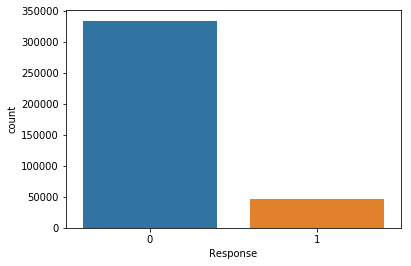

In [7]:
# Target variable count
sns.countplot(df.Response)

* The response is baised towards 0
* Over sampling can be used to balance the data

C:\Users\prasr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


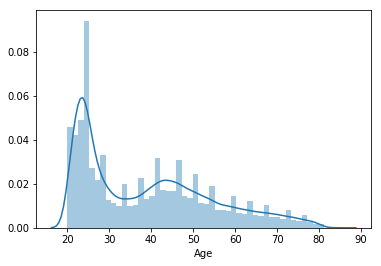

In [8]:
# Age distribution of the Customers
sns.distplot(df.Age)

* majority of the customers fall between the age of 20-30
* As the age increases the customers count decreases

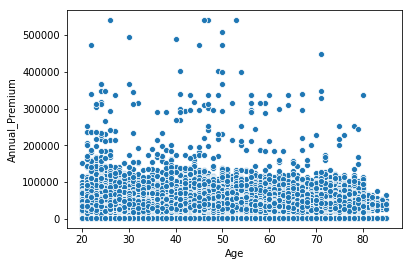

In [9]:
# scatter plot between Age and Annua_Premium
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

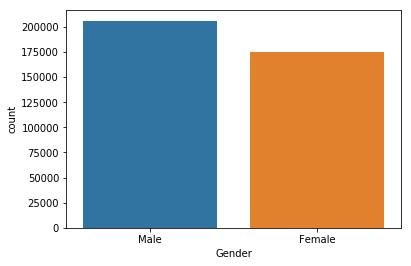

In [10]:
# count of Male and Female
sns.countplot(df.Gender)

* The gender is balanced between Male and Female

## Correlation Matrix

Correlation matrix-


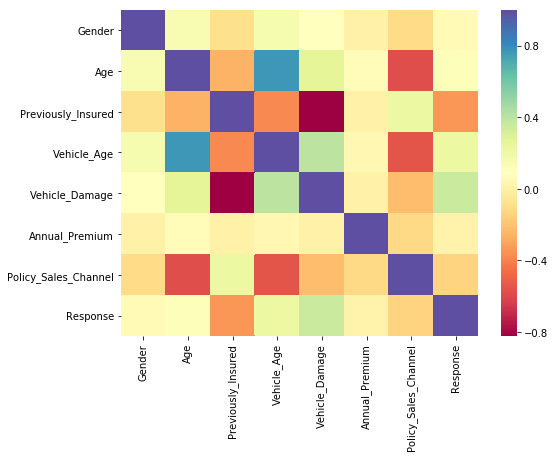

In [24]:
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='Spectral');

## Vehicle damage

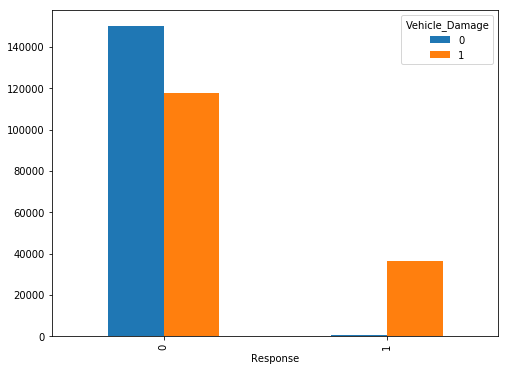

In [25]:
pd.crosstab(df['Response'], df['Vehicle_Damage']).plot(kind='bar');

## Handling the categorical values and Encoding

In [11]:
 
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

df.loc[df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df.loc[df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0


df.loc[df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df.loc[df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


## converting the float values to integer

In [12]:
for col in df.columns:
    df[col] = df[col].astype(np.int32)

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


## Checking the Correlation

In [13]:

for col in df.columns:
    if col == 'Response':
        continue
    print(col, df[col].corr(df['Response']))

id -0.0013681501902185374
Gender 0.052439913771342224
Age 0.11114689471251052
Driving_License 0.010155174594073956
Region_Code 0.010569855615223145
Previously_Insured -0.34117046261352474
Vehicle_Age 0.2218739872179901
Vehicle_Damage 0.3543995438797554
Annual_Premium 0.022574695542560096
Policy_Sales_Channel -0.13904150082916147
Vintage -0.001050372001989892


In [14]:
df = df.drop(['Region_Code', 'Vintage', 'Driving_License','id'], axis=1)
df.columns

Index(['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

# Model Buildling

In [15]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


# Oversampling

In [17]:
df = pd.concat([X_train,y_train],axis=1)

from sklearn.utils import resample,shuffle
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    267585
0    267585
Name: Response, dtype: int64

In [18]:
X_new = balanced_df.drop(['Response'], axis=1)
y_new = balanced_df['Response']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=666)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(random_state=666)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred,))
accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.57      0.64      0.60     53640
           1       0.59      0.51      0.55     53394

    accuracy                           0.58    107034
   macro avg       0.58      0.58      0.58    107034
weighted avg       0.58      0.58      0.58    107034



0.5784797354111778

-

## XGBoost Classifier

In [21]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report



xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred,))
accuracy_score(y_test, y_pred)

C:\Users\prasr\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              precision    recall  f1-score   support

           0       0.91      0.68      0.78     53640
           1       0.75      0.93      0.83     53394

    accuracy                           0.81    107034
   macro avg       0.83      0.81      0.80    107034
weighted avg       0.83      0.81      0.80    107034



0.8069865650167236

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     53640
           1       0.86      0.99      0.92     53394

    accuracy                           0.92    107034
   macro avg       0.92      0.92      0.92    107034
weighted avg       0.92      0.92      0.92    107034



0.9154941420483211

* we can conclude that Random forest performs well without doing the hyper parameter optimization

## saving the model

In [23]:
import pickle
filename = 'Cross_Sell_Prediction_Model.sav'
pickle.dump(clf, open(filename, 'wb'))